In [1]:
%matplotlib inline

from sympy import *
from sympy.geometry import *
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
from matplotlib.path import Path
import matplotlib.patches as patches
from IPython.display import display
from sympy.geometry.util import _symbol

init_printing()

import math
import numpy

def slope_from_points(point1, point2):
    return (point2.y - point1.y)/(point2.x - point1.x)

def get_xlim_value(point1, point2):
    if point1.x == point2.x:
        data_x = (point1.x, point1.x)
        data_y = ylim
    else:
        slope = slope_from_points(point1, point2)
        intercept = point1.y - slope*point1.x
        data_x = xlim
        data_y = (xlim[0]*slope+intercept, ylim[1]*slope+intercept)
    return data_x, data_y

def get_xlim_value_ray(point1, point2):
    if point1.x == point2.x:
        data_x = (point1.x, point1.x)
        if point1.y > point2.y:
            data_y = (point1.y, ylim[0])
        else:
            data_y = (point1.y, ylim[1])
    else:
        slope = slope_from_points(point1, point2)
        intercept = point1.y - slope*point1.x
        data_x = (point1.x, xlim[1])
        data_y = (point1.y, ylim[1]*slope+intercept)
    return data_x, data_y

try:
    currentobjs = currentobjs
except NameError:
    currentobjs = []

def plot(args, selected):
    obj = args["obj"]
    name = args.get("name", "")
    if type(obj) == Point2D:
        if selected == False:
            plt.plot(obj.x, obj.y, 'ro')
        else:
            plt.plot(obj.x, obj.y, 'o', color="orange")
        plt.annotate(name, (obj.x,obj.y), fontsize=16, color=(0.5,0.1,0.1))
    if type(obj) == Segment:
        # plt.axes().add_line(mpl_lines.Line2D((obj.p1.x, obj.p2.x), (obj.p1.y, obj.p2.y)))
        if selected == False:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], 'b-')
        else:
            plt.plot([obj.p1.x, obj.p2.x], [obj.p1.y, obj.p2.y], '-', color="orange", linewidth=2)
    if type(obj) == Line:
        coor = get_xlim_value(obj.p1,obj.p2)
        if selected == False:
            plt.plot(coor[0], coor[1], 'b-')
        else:
            plt.plot(coor[0], coor[1], '-', color="orange", linewidth=2)
    if type(obj) == Ray:
        coor = get_xlim_value_ray(obj.p1,obj.p2)
        if selected == False:
            plt.plot(coor[0], coor[1], 'b-')
        else:
            plt.plot(coor[0], coor[1], '-', color="orange", linewidth=2)
    if type(obj) == Circle:
        if selected == False:
            artist = plt.Circle((obj.center.x, obj.center.y), obj.radius, edgecolor="blue", facecolor="none")
        else:
            artist = plt.Circle((obj.center.x, obj.center.y), obj.radius, edgecolor="orange", facecolor="none", lw=2)
        plt.gca().add_artist(artist)
    if type(obj) == Polygon or type(obj) == Triangle:
        verts = []
        codes = []
        
        for k,v in enumerate(obj.vertices):
            verts.append((v.x, v.y))
            if k == 0:
                codes.append(Path.MOVETO)
            else:
                codes.append(Path.LINETO)
        verts.append((obj.vertices[0].x, obj.vertices[0].y))
        codes.append(Path.CLOSEPOLY)
        
        path = Path(verts, codes)
        if selected == False:
            patch = patches.PathPatch(path, facecolor=(0,1,0.5,0.5), edgecolor="none", lw=1)
        else:
            patch = patches.PathPatch(path, facecolor=(1,0.5,0,0.5), edgecolor="none", lw=2)
        plt.gca().add_patch(patch)

def draw(*objs, add_currentobjs=True, sizex=16, sizey=None, colcount=2, rowcount=None):
    
    if rowcount == None:
        rowcount = math.ceil(len(objs) / colcount)
    
    if sizey == None:
        sizey = len(objs)*sizex/colcount/colcount
    
    plt.figure(figsize=(sizex,sizey))
    for index, obj in enumerate(objs):
        plt.subplot(rowcount, colcount, index+1)
        
        plt.gca().set_xlim(xlim)
        plt.gca().set_ylim(ylim)
        plt.gca().set_aspect('equal')
        
        for currentobj in currentobjs:
            plot(currentobj, False)
        plot(obj, True)
        
        if add_currentobjs:
            currentobjs.append(obj)
            plt.title(str(len(currentobjs)))
    
    plt.show()


# 方程式をyについての方程式に変換する
def y_equal(ex):
    return Eq(_symbol('y'), solve(ex, _symbol('y'))[0])

# 問題を解こう！

参考書の問題をsympyで解いて見ます．

## ISBN978-4-402-27286-9 「Focus Gold 4th Edition 数学Ⅱ＋B」
### p.228
#### [1]

##### (1)

とりあえず点Aと点Bを描画．

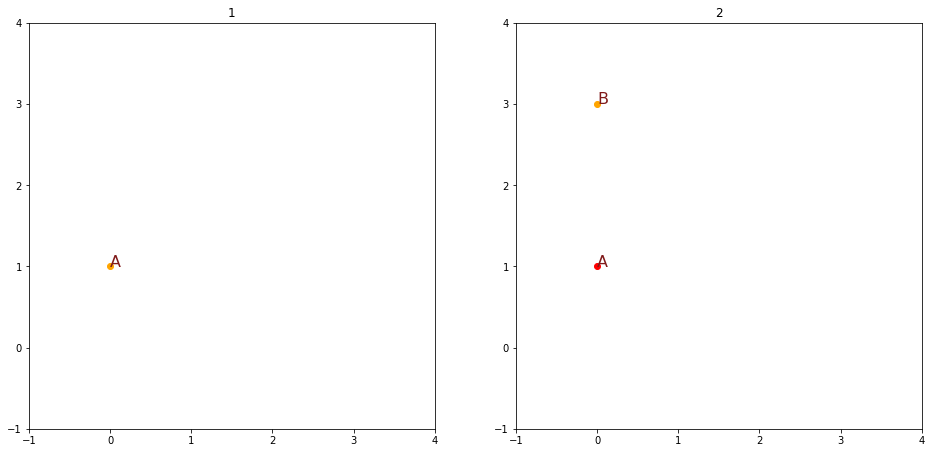

In [2]:
t = Symbol('t', positive=True)

currentobjs = []

xlim = (-1,4)
ylim = (-1,4)

A = Point2D(0, 1) # 点A
B = Point2D(0, 3) # 点B
P = Point2D(t, 0) # 点P

draw({"obj": A, "name": "A"}, {"obj": B, "name": "B"})

A, B, Pを通る円の中心を求める．

In [3]:
circle = Circle(A, B, P)

In [4]:
(circle.center.x, circle.center.y)

##### (2), (3)

circleの点Pでの接線がx軸と一致するtの値を求める．

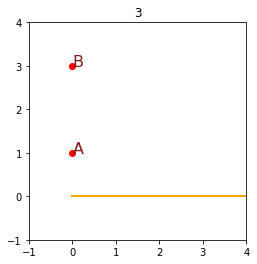

In [5]:
xp = Ray(Point2D(0, 0), Point2D(1, 0))# x軸の正の部分=Pの動く範囲
draw({"obj": xp})

In [6]:
eq = circle.tangent_lines(P)[0].equation().subs(_symbol('y'), 0) # Circle(A, B, P)の点Pでの接線の方程式にy=0を代入したもの
sol = solve(eq)

sol

したがって，(2)の答えは

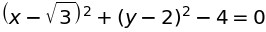

In [7]:
Eq(circle.equation().subs(t, sol[0][t]), 0)

(3)の答えは

In [8]:
(sol[0][t], 0)

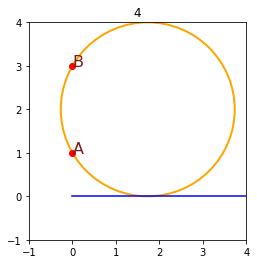

In [9]:
_circle = Circle(A, B, Point2D(sol[0][t], 0))
draw({"obj": _circle})

In [10]:
del t, A, B, P, circle, xp, eq, sol, _circle

##### 反省しよう

解答編の解説では，circleの中心のx座標とtの値が一致することから，$t=\sqrt{3}$を導き出していた．こっちの方がより綺麗な解き方だったと思う．

#### [2]
##### (1)

$C_1$は$Circle(Point2D(0, 1), 1)$  
$C_2$は$Circle(Point2D(4, r), r)$

$C_1$の中心を$O_1$，$C_2$の中心を$O_2$とする．

$O_1O_2$と$C_1$の交点と，$O_1O_2$と$C_2$の交点が一致すれば良い．

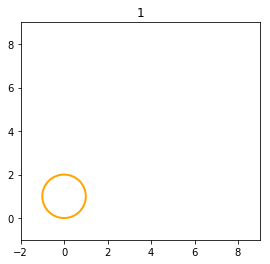

In [11]:
r = Symbol("r", real=True)
x = Symbol("x")
y = Symbol("y")

xlim = (-2,9)
ylim = (-1,9)

currentobjs = []

c1 = Circle(Point2D(0, 1), 1)
c2 = Circle(Point2D(4, r), r)

o1o2_c1 = Line(c1.center, c2.center).intersection(c1)
o1o2_c2 = Line(c1.center, c2.center).intersection(c2)

draw({"obj": c1})

In [12]:
o1o2_c1 # O1O2とC1の交点

In [13]:
o1o2_c2 # O1O2とC2の交点

交点がそれぞれ2つあるので，４通りに場合分けすれば良い．

In [14]:
solve([Eq(o1o2_c1[0].x, o1o2_c2[0].x), Eq(o1o2_c1[0].y, o1o2_c2[0].y)], r)

In [15]:
solve([Eq(o1o2_c1[0].x, o1o2_c2[1].x), Eq(o1o2_c1[0].y, o1o2_c2[1].y)], r)

In [16]:
solve([Eq(o1o2_c1[1].x, o1o2_c2[0].x), Eq(o1o2_c1[1].y, o1o2_c2[0].y)], r)

In [17]:
solve([Eq(o1o2_c1[1].x, o1o2_c2[1].x), Eq(o1o2_c1[1].y, o1o2_c2[1].y)], r)

したがって，$r = 4$

##### (2)

$C_1 = Circle(Point2D(0, 1), 1)$  
$C_2 = Circle(Point2D(4, 4), 4)$  
であることが分かった．

二つの円の交点を求め，その点を通る接線の方程式を求める．  
二つの円は接するのだから交点は一つになるはずだ．

In [18]:
_c2 = Circle(Point2D(4,4),4)

intersections = c1.intersection(_c2)
intersections

予想通り交点が一つになった．

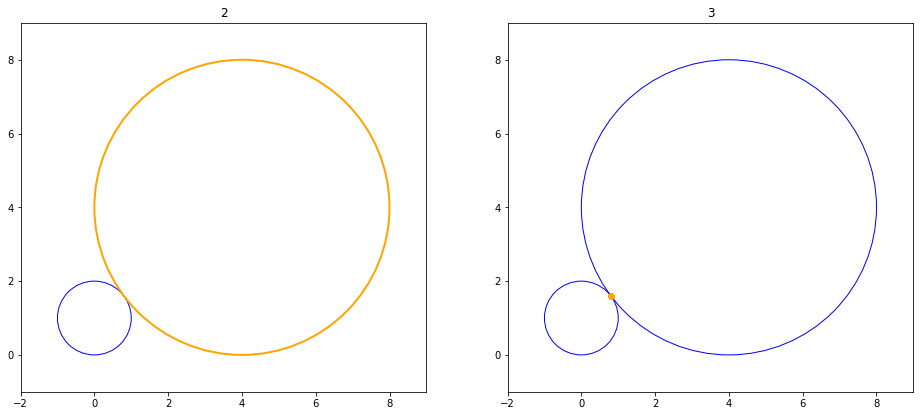

In [19]:
draw({"obj": _c2}, {"obj": intersections[0]})

次にこの点を通りc1と接する直線を求める

In [20]:
tls = c1.tangent_lines(intersections[0])
tls

こちらも一つのみ存在するようだ．

したがって，答えは

In [21]:
Eq(tls[0].equation(), 0)

実は共通接線は他にも存在することが答えを見て判明したので，全ての共通接線を一度に求めるため，もう少し別の解き方をしてみる．

まず，答えとなる方程式を$y = ax + b$とおく．  
また，共通接線を$l$とする．

In [22]:
a = Symbol("a")
b = Symbol("b")
l = Line(Point2D(0,b), slope = a)

c1_intersection = c1.intersection(l)
_c2_intersection = _c2.intersection(l)

$l$と$C_1$の２つの交点が一致し，かつ$l$と$C_2$の２つの交点が一致することから，連立方程式を作り，それを解く．

In [23]:
sol1 = solve([Eq(c1_intersection[0].x, c1_intersection[1].x), Eq(c1_intersection[0].y, c1_intersection[1].y)], a)
sol1 # aとして考えられるもの

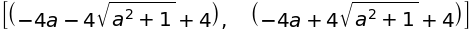

In [24]:
sol2 = solve([Eq(_c2_intersection[0].x, _c2_intersection[1].x), Eq(_c2_intersection[0].y, _c2_intersection[1].y)], b)
sol2 # bとして考えられるもの

In [25]:
sol3 = solve([Eq(a, sol1[0][0]), Eq(b, sol2[0][0])], [a, b])
sol3

In [26]:
sol4 = solve([Eq(a, sol1[1][0]), Eq(b, sol2[0][0])], [a, b])
sol4

In [27]:
sol5 = solve([Eq(a, sol1[0][0]), Eq(b, sol2[1][0])], [a, b])
sol5

In [28]:
sol6 = solve([Eq(a, sol1[1][0]), Eq(b, sol2[1][0])], [a, b])
sol6

以上の計算結果から，

$ (a, b) = \left ( - \frac{4}{3}, \quad \frac{8}{3}\right ), \quad \left ( 0, \quad 0\right ), \quad \left ( \frac{24}{7}, \quad \frac{32}{7}\right ) $

したがって，答えは

In [29]:
eq = Eq(y, a * x + b)

eq.subs(zip([a, b], sol3[0]))

In [30]:
eq.subs(zip([a, b], sol3[1]))

In [31]:
eq.subs(zip([a, b], sol6[0]))

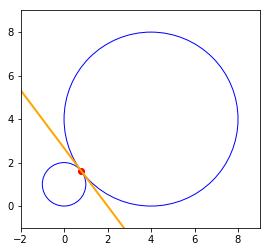

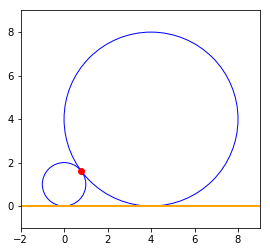

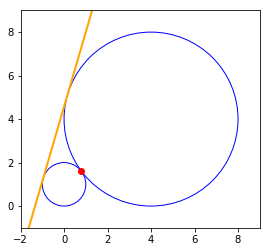

In [32]:
draw({"obj": l.subs(zip([a, b], sol3[0]))}, add_currentobjs=False)
draw({"obj": l.subs(zip([a, b], sol3[1]))}, add_currentobjs=False)
draw({"obj": l.subs(zip([a, b], sol6[0]))}, add_currentobjs=False)

In [33]:
del r, x, y, c1, c2, o1o2_c1, o1o2_c2, _c2, intersections, tls, a, b, l, c1_intersection, _c2_intersection, sol1, sol2, sol3, sol4, sol5, sol6

#### [3]
##### (1)

まずは，わかりやすくするために図を書こうと思う．
下の図は仮に$a = 5$とした時のものである．

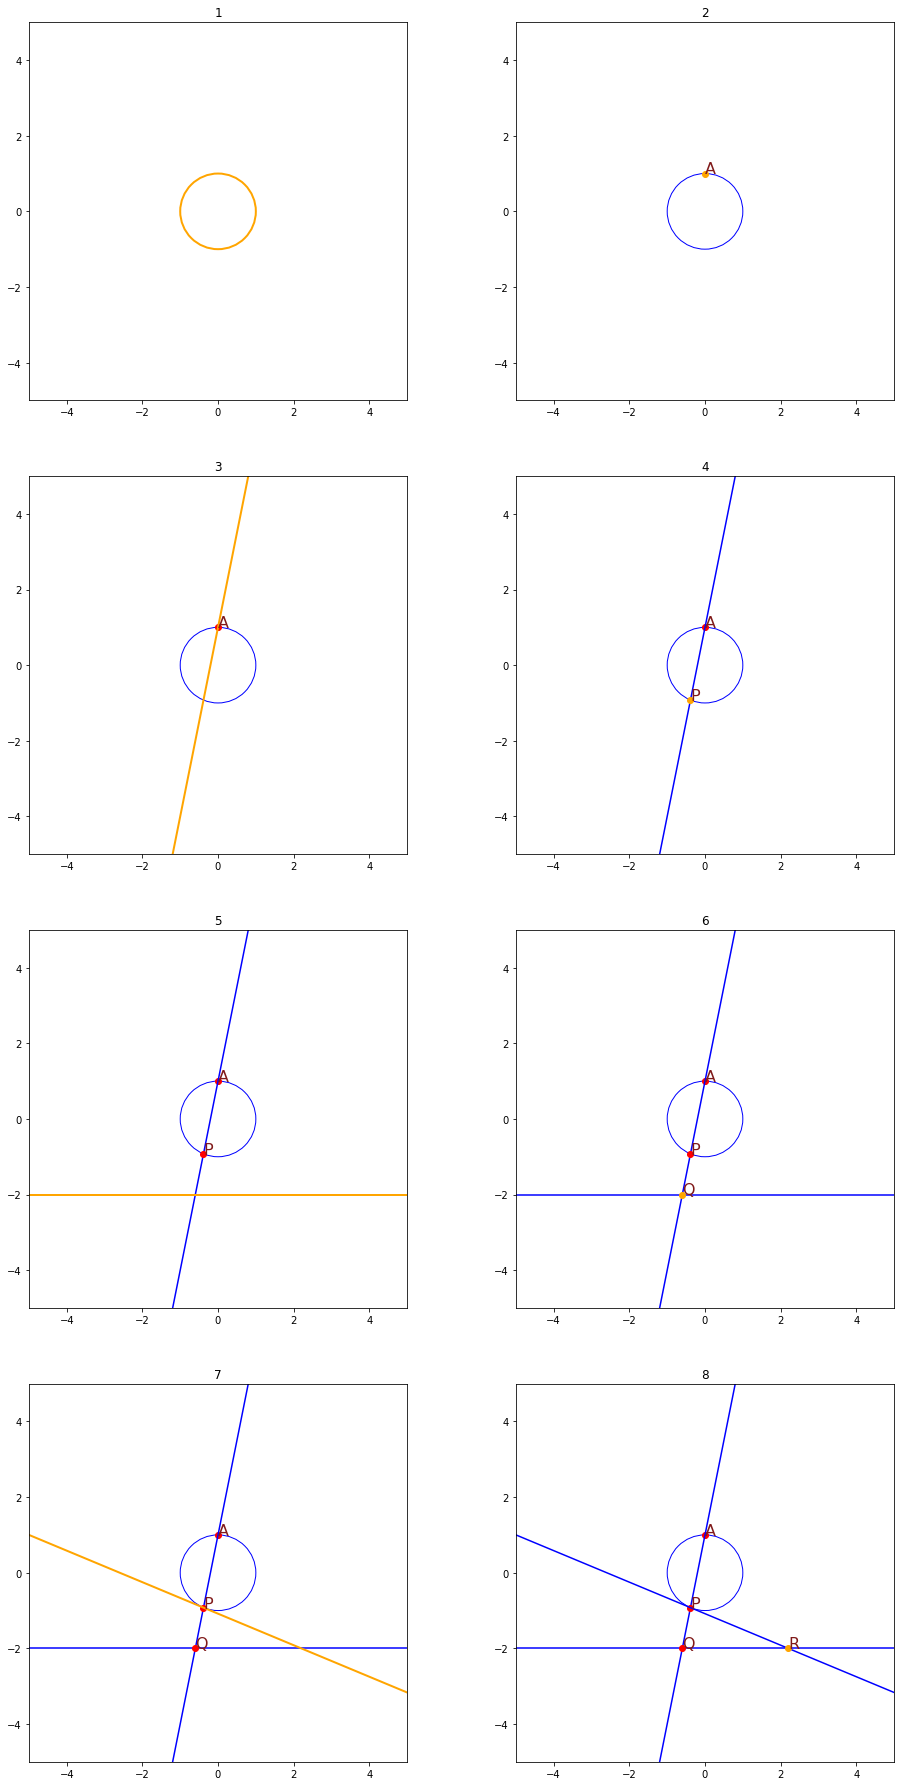

In [34]:
xlim = (-5,5)
ylim = (-5,5)

currentobjs = []

C = Circle(Point2D(0, 0), 1)
a = Symbol("a", real=True, positive=True)
A = Point2D(0, 1)
l = Line(p1 = A, slope = a)
P = next(filter(lambda x: x != A, C.intersection(l)))
ym2 = Line(Point2D(0, -2), Point2D(1, -2))
Q = l.intersection(ym2)[0]
m = C.tangent_lines(P)[0]
R = m.intersection(ym2)[0]

draw(
    {"obj": C, "name": "C"},
    {"obj": A, "name": "A"}, 
    {"obj": l.subs(a, 5), "name": "l"}, 
    {"obj": P.subs(a, 5), "name": "P"}, 
    {"obj": ym2, "name": "y = -2"}, 
    {"obj": Q.subs(a, 5), "name": "Q"}, 
    {"obj": m.subs(a, 5), "name": "m"}, 
    {"obj": R.subs(a, 5), "name": "R"}
)

(1)の答えは，

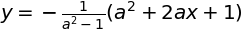

In [35]:
currentobjs = []

y_equal(Eq(m.equation(), 0))

##### (2)

まず，線分QRの長さを求める．

In [36]:
QRlen = Segment(Q, R).length
QRlen

微分し，方程式を解く．

In [37]:
sol1 = solve(Eq(QRlen.diff(), 0))
sol1

$a = \sqrt{3}$であることが分かった．

ちなみに，線分QRの長さやそれを微分したものをグラフにすると，次のようになる．

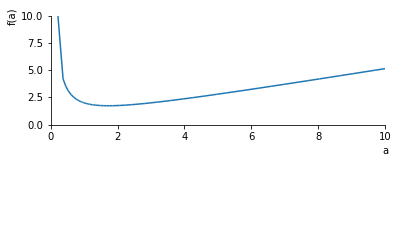

In [38]:
import sympy.plotting

sympy.plotting.plot(QRlen, xlim=(0,10), ylim=(-10,10)) # 線分QRの長さ
None

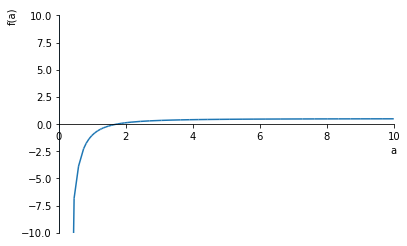

In [39]:
import sympy.plotting

sympy.plotting.plot(QRlen.diff(), xlim=(0,10), ylim=(-10,10)) # 線分QRの長さを微分したもの
None

線分QRの長さの式に$a$を代入する．

In [40]:
QRlen.subs(a, sol1[0])

したがって，答えは，最小値$\cdots\sqrt{3}$，$a$の値$\cdots\sqrt{3}$

##### (3)

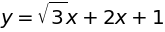

In [41]:
y_equal(
   Eq(
       Line(
           Triangle(
               Q.subs(a,sol1[0]),
               A.subs(a,sol1[0]),
               R.subs(a,sol1[0])
           ).bisectors()[A.subs(a,sol1[0])]
       ).equation(),0
   )
)

In [42]:
del C, a, A, l, P, ym2, Q, m, R, QRlen, sol1

#### [4]

##### (1)

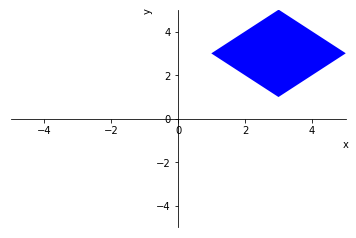

In [44]:
x = Symbol("x")
y = Symbol("y")

ieq = (Abs(x - 3) + Abs(y - 3)) <= 2

sympy.plotting.plot_implicit(ieq)
None

(2)以降は，sympyらしい解き方が見つからなかったので保留とする．